In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import erf
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.''' 
    return plt.cm.get_cmap(name, n)

/tmp/ipykernel_2344360/2291934623.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


(0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0)
(0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0)
(0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0)
(0.596078431372549, 0.3058823529411765, 0.6392156862745098, 1.0)
(1.0, 1.0, 0.2, 1.0)
(0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0)
(0.9686274509803922, 0.5058823529411764, 0.7490196078431373, 1.0)
(0.6, 0.6, 0.6, 1.0)


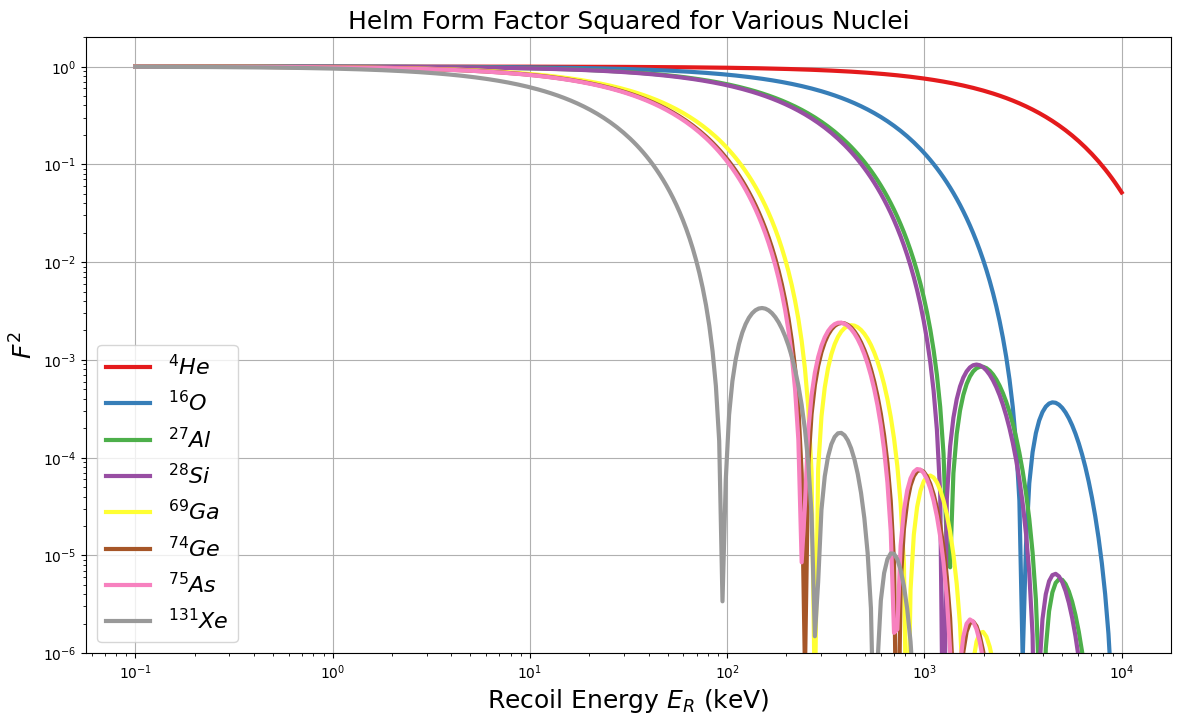

In [2]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
def helm_form_factor_squared(Energy,A):
    # Constants
    s = 0.9e-15       # in m
    hbar = 6.5821220E-16 # in eV*s
    c = 299792458 # in m/s
    
    q = np.sqrt(2 * A*0.938e12 * Energy) #convert to momentum [q has units of keV]
    R = 1.14e-15 * A**(1./3) #[R units of m]
    x = q * R / hbar / c
    j1 = np.sin(x) / x**2 - np.cos(x) / x
    F = 3 * j1 / x * np.exp(-(q * s / hbar / c)**2 / 2)
    return F * F

# Momentum transfer range in fm^-1
E_values = np.logspace(-1, 4, 300) #energy in keV
masses = [4,16,27,28,69,74,75,131]
labels = ["$^{4}He$","$^{16}O$","$^{27}Al$","$^{28}Si$","$^{69}Ga$","$^{74}Ge$","$^{75}As$","$^{131}Xe$"]
cmap = get_cmap(len(masses),'Set1')
for i,atom_mass in enumerate(masses):
    helm_squared = helm_form_factor_squared(E_values,atom_mass)
    print(cmap(i))
    plt.plot(E_values, helm_squared,label = labels[i],linewidth=3,c=cmap(i))
    
plt.xscale('log')
plt.xlabel('Recoil Energy $E_{R}$ (keV)',fontsize=18)
plt.ylabel('$F^{2}$',fontsize=18)
plt.title('Helm Form Factor Squared for Various Nuclei',fontsize=18)
plt.yscale("log")
plt.ylim(1e-6,2)
plt.grid(True)
plt.legend(loc = 'lower left',fontsize = 16)
plt.show()

/tmp/ipykernel_2344360/2291934623.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


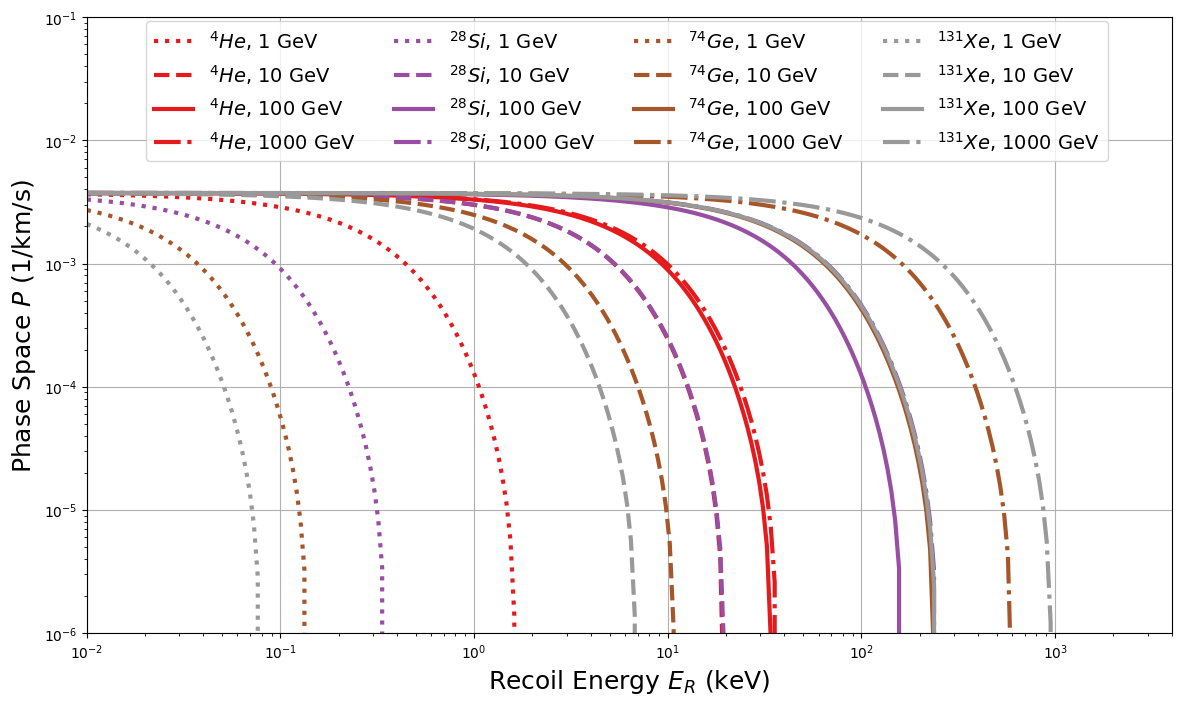

In [3]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
# Constants
c = 299792458               # speed of light in m/s
#A = 131
v_0 = 220.0         # DM velocity in m/s
v_esc = 544         # Galactic escape velocity in m/s
v_e = 232.0         # Earth's velocity in m/s


def DM_halo(Energy,A,wimp):
    """
    Relative velocity between WIMP and xenon nucleus.
    v: WIMP velocity in m/s
    """
    #E_DM = (1/2)m_wimp*v**2
    m_wimp = wimp*1e12/c**2 #wimp mass in keV
    m_N = A*0.938e12/c**2
    r = 4*(m_wimp*m_N)/(m_wimp+m_N)**2
    v_min = np.sqrt(2*Energy/(m_wimp*r))
    N_esc =erf(v_esc/v_0) - (2/np.sqrt(np.pi))*(v_esc/v_0)*np.exp(-v_esc**2/v_0**2)
    P = (1/N_esc)*(2/(np.sqrt(np.pi)*v_0))*((np.sqrt(np.pi)/4)*(v_0/v_e)*(erf((v_min+v_e)/v_0)-erf((v_min-v_e)/v_0))-np.exp(-v_esc**2/v_0**2))
    return P
    

E_values = np.logspace(-2, 4, 300) #energy in eV
masses = [4,28,74,131]
wimp_mass = [1,10,100,1000]
labels = ["$^{4}He$","$^{28}Si$","$^{74}Ge$","$^{131}Xe$"]
cmap = get_cmap(len(masses),'Set1')

for i,atom_mass in enumerate(masses):
    for j,wimps in enumerate(wimp_mass):
        P_DM = DM_halo(E_values,atom_mass,wimps)
        if j == 0: mark = "dotted"
        if j == 1: mark = "dashed"
        if j == 2: mark = "solid"
        if j == 3: mark = "dashdot"
        plt.plot(E_values, P_DM,label = labels[i]+ ", %d GeV" %wimps,linewidth=3,c=cmap(i),linestyle=mark)


# Plotting
plt.xscale("log")
plt.xlabel('Recoil Energy $E_{R}$ (keV)',fontsize=18)
plt.ylabel('Phase Space $P$ (1/km/s)',fontsize=18)
plt.title('',fontsize=18)
plt.yscale("log")
plt.ylim(1e-6,1e-1)
plt.xlim(0.01,4e3)
plt.grid(True)
plt.legend(loc = 'best',bbox_to_anchor=(0.45, 0.51, 0.5, 0.5),fontsize = 14,ncol=4)
plt.show()

/tmp/ipykernel_2344360/2291934623.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


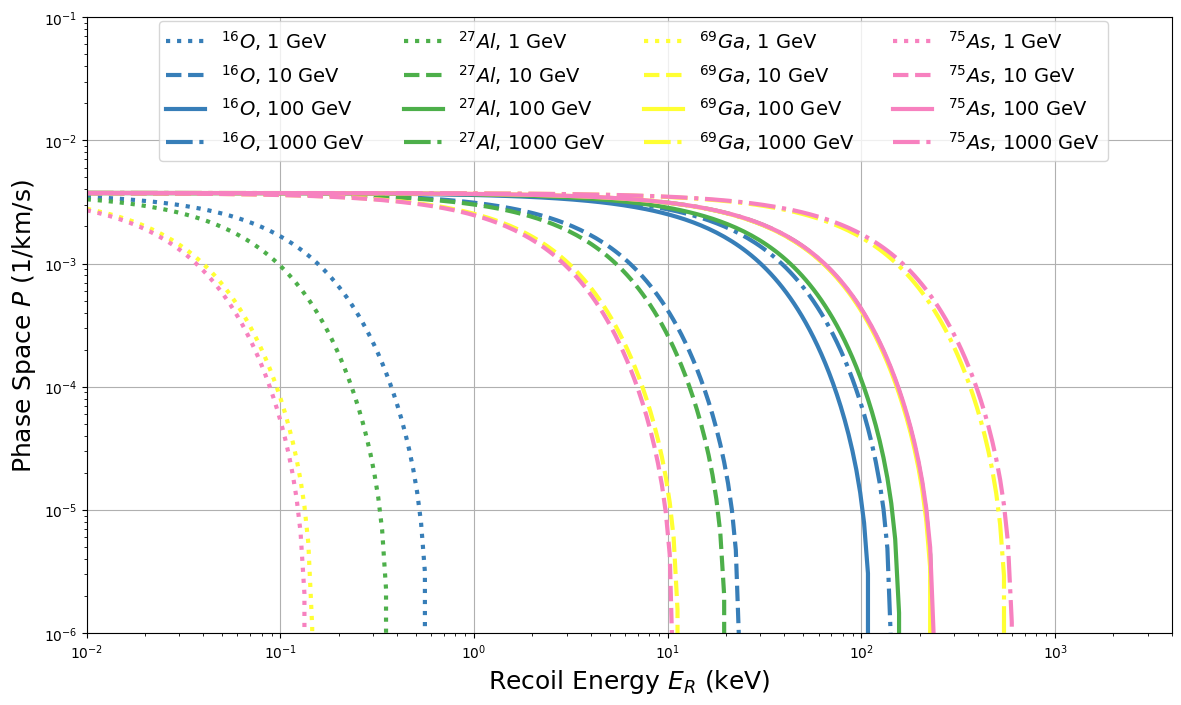

In [4]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
E_values = np.logspace(-2, 4, 300) #energy in eV
masses = [16,27,69,75]
wimp_mass = [1,10,100,1000]
labels = ["$^{16}O$","$^{27}Al$","$^{69}Ga$","$^{75}As$"]
cmap = get_cmap(8,'Set1')

for i,atom_mass in enumerate(masses):
    for j,wimps in enumerate(wimp_mass):
        P_DM = DM_halo(E_values,atom_mass,wimps)
        if j == 0: mark = "dotted"
        if j == 1: mark = "dashed"
        if j == 2: mark = "solid"
        if j == 3: mark = "dashdot"
        colors=cmap(i+1)
        if i == 2 : colors=cmap(4)
        if i == 3 : colors=cmap(6)
        plt.plot(E_values, P_DM,label = labels[i]+ ", %d GeV" %wimps,linewidth=3,c=colors,linestyle=mark)

# Plotting
plt.xscale("log")
plt.xlabel('Recoil Energy $E_{R}$ (keV)',fontsize=18)
plt.ylabel('Phase Space $P$ (1/km/s)',fontsize=18)
plt.title('',fontsize=18)
plt.yscale("log")
plt.ylim(1e-6,1e-1)
plt.xlim(0.01,4e3)
plt.grid(True)
plt.legend(loc = 'best',bbox_to_anchor=(0.45, 0.51, 0.5, 0.5),fontsize = 14,ncol=4)
plt.show()

/tmp/ipykernel_2344360/2291934623.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


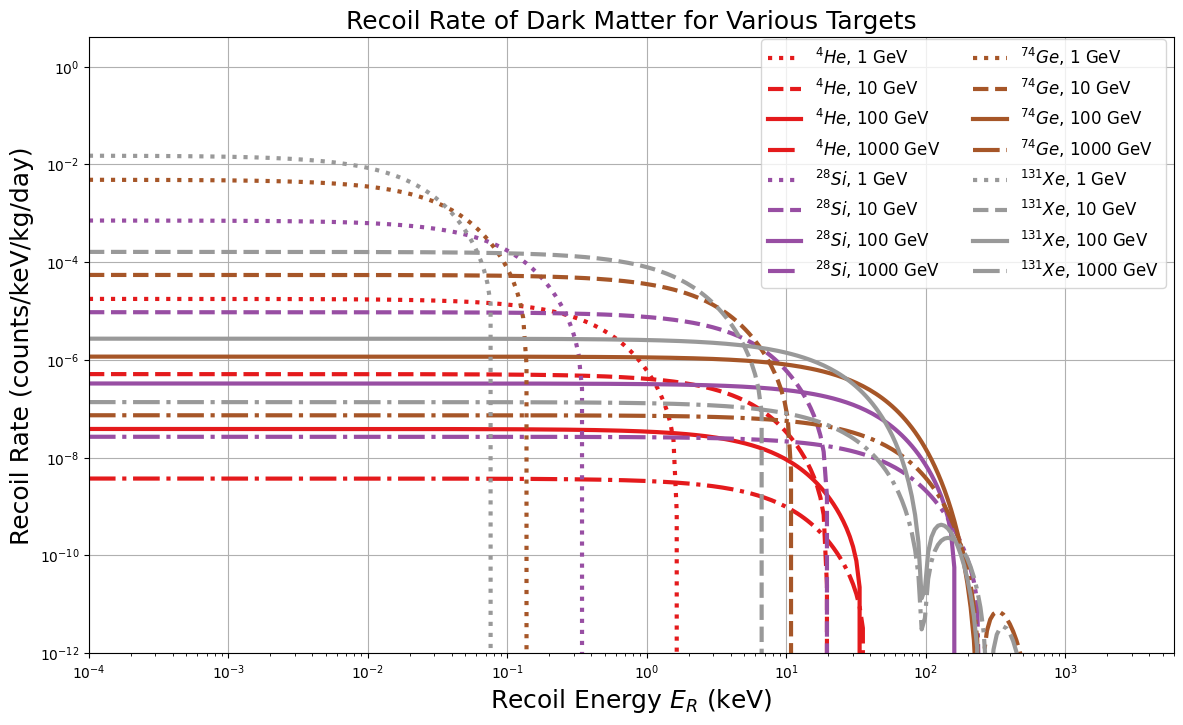

In [5]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
c = 299792458               # speed of light in m/s
v_0 = 220.0         # DM velocity in km/s
v_esc = 544         # Galactic escape velocity in km/s
v_e = 232.0         # Earth's velocity in km/s
dm_density = 0.3e12/c**2 #dm density in kev/c^2/cm^3
apriori_sigma = 1e-45 # cross section in cm^2


def recoil_rate(Energy,A,wimp):
    """
    Relative velocity between WIMP and xenon nucleus.
    v: WIMP velocity in m/s
    """
    m_wimp = wimp*1e12/c**2
    m_N = A*0.938e12/c**2
    mu_dm = m_wimp*m_N/(m_wimp+m_N)
    secperday = 86400 # in s/day
    kevperkg = 5e-33
    drde = apriori_sigma*(dm_density/(2*m_wimp*mu_dm))*A**2 * helm_form_factor_squared(Energy,A) * DM_halo(Energy,A,wimp)*(secperday)/(kevperkg)
    return drde

E_values = np.logspace(-4, 3, 300) #energy in eV
masses = [4,28,74,131]
wimp_mass = [1,10,100,1000]
labels = ["$^{4}He$","$^{28}Si$","$^{74}Ge$","$^{131}Xe$"]
cmap = get_cmap(len(masses),'Set1')
for i,atom_mass in enumerate(masses):
    for j,wimps in enumerate(wimp_mass):
        rate = recoil_rate(E_values,atom_mass,wimps)
        if j == 0: mark = "dotted"
        if j == 1: mark = "dashed"
        if j == 2: mark = "solid"
        if j == 3: mark = "dashdot"
        plt.plot(E_values, rate,label = labels[i]+ ", %d GeV" %wimps,linewidth=3,c=cmap(i),linestyle=mark)
        
plt.xscale("log")
plt.xlabel('Recoil Energy $E_{R}$ (keV)',fontsize=18)
plt.ylabel('Recoil Rate (counts/keV/kg/day)',fontsize=18)
plt.title('Recoil Rate of Dark Matter for Various Targets',fontsize=18)
plt.yscale("log")
plt.ylim(1e-12,4e0)
plt.xlim(1e-4,6e3)
plt.grid(True)
ax.yaxis.set_tick_params(labelleft=True)
plt.legend(loc = 'best',bbox_to_anchor=(0.5, 0.51, 0.5, 0.5),fontsize = 12,ncol=2)
plt.show()

/tmp/ipykernel_2344360/2291934623.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


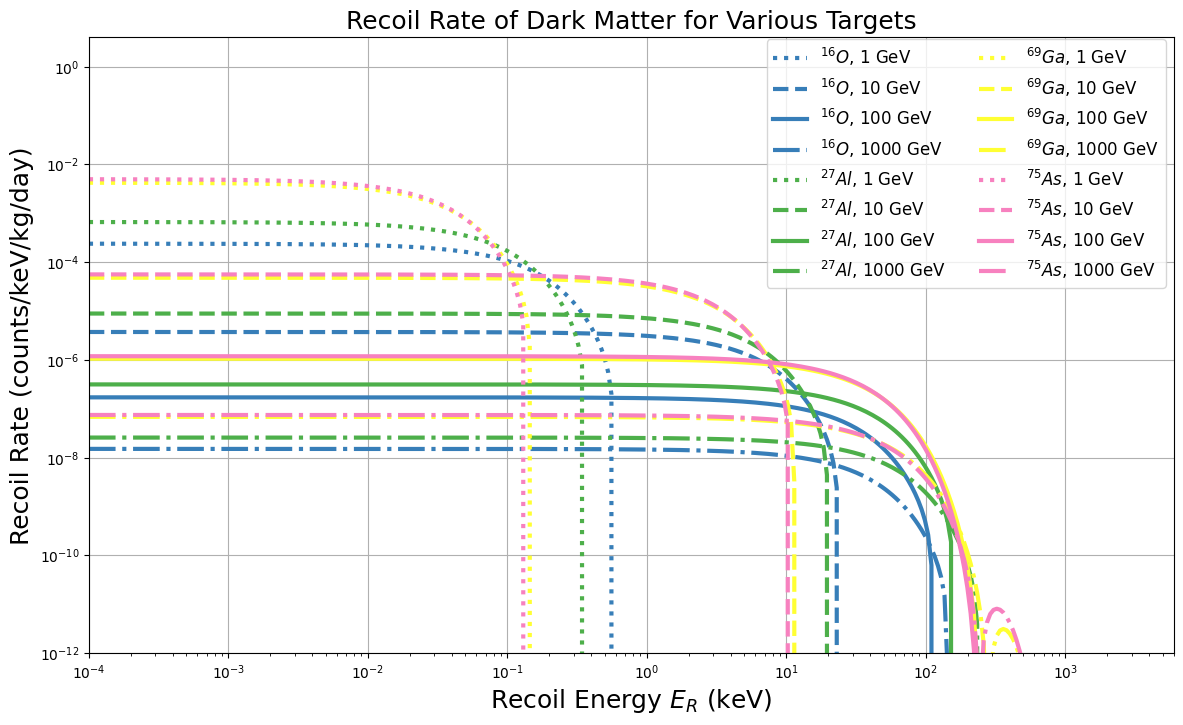

In [6]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
E_values = np.logspace(-4, 3, 300) #energy in eV
masses = [16,27,69,75]
wimp_mass = [1,10,100,1000]
labels = ["$^{16}O$","$^{27}Al$","$^{69}Ga$","$^{75}As$"]
cmap = get_cmap(8,'Set1')
for i,atom_mass in enumerate(masses):
    for j,wimps in enumerate(wimp_mass):
        rate = recoil_rate(E_values,atom_mass,wimps)
        if j == 0: mark = "dotted"
        if j == 1: mark = "dashed"
        if j == 2: mark = "solid"
        if j == 3: mark = "dashdot"
        colors=cmap(i+1)
        if i == 2 : colors=cmap(4)
        if i == 3 : colors=cmap(6)
        plt.plot(E_values, rate,label = labels[i]+ ", %d GeV" %wimps,linewidth=3,c=colors,linestyle=mark)
        
plt.xscale("log")
plt.xlabel('Recoil Energy $E_{R}$ (keV)',fontsize=18)
plt.ylabel('Recoil Rate (counts/keV/kg/day)',fontsize=18)
plt.title('Recoil Rate of Dark Matter for Various Targets',fontsize=18)
plt.yscale("log")
plt.ylim(1e-12,4e0)
plt.xlim(1e-4,6e3)
plt.grid(True)
ax.yaxis.set_tick_params(labelleft=True)
plt.legend(loc = 'best',bbox_to_anchor=(0.5, 0.51, 0.5, 0.5),fontsize = 12,ncol=2)
plt.show()

/tmp/ipykernel_2344360/2291934623.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


0
1
2
3
4
5
6
7


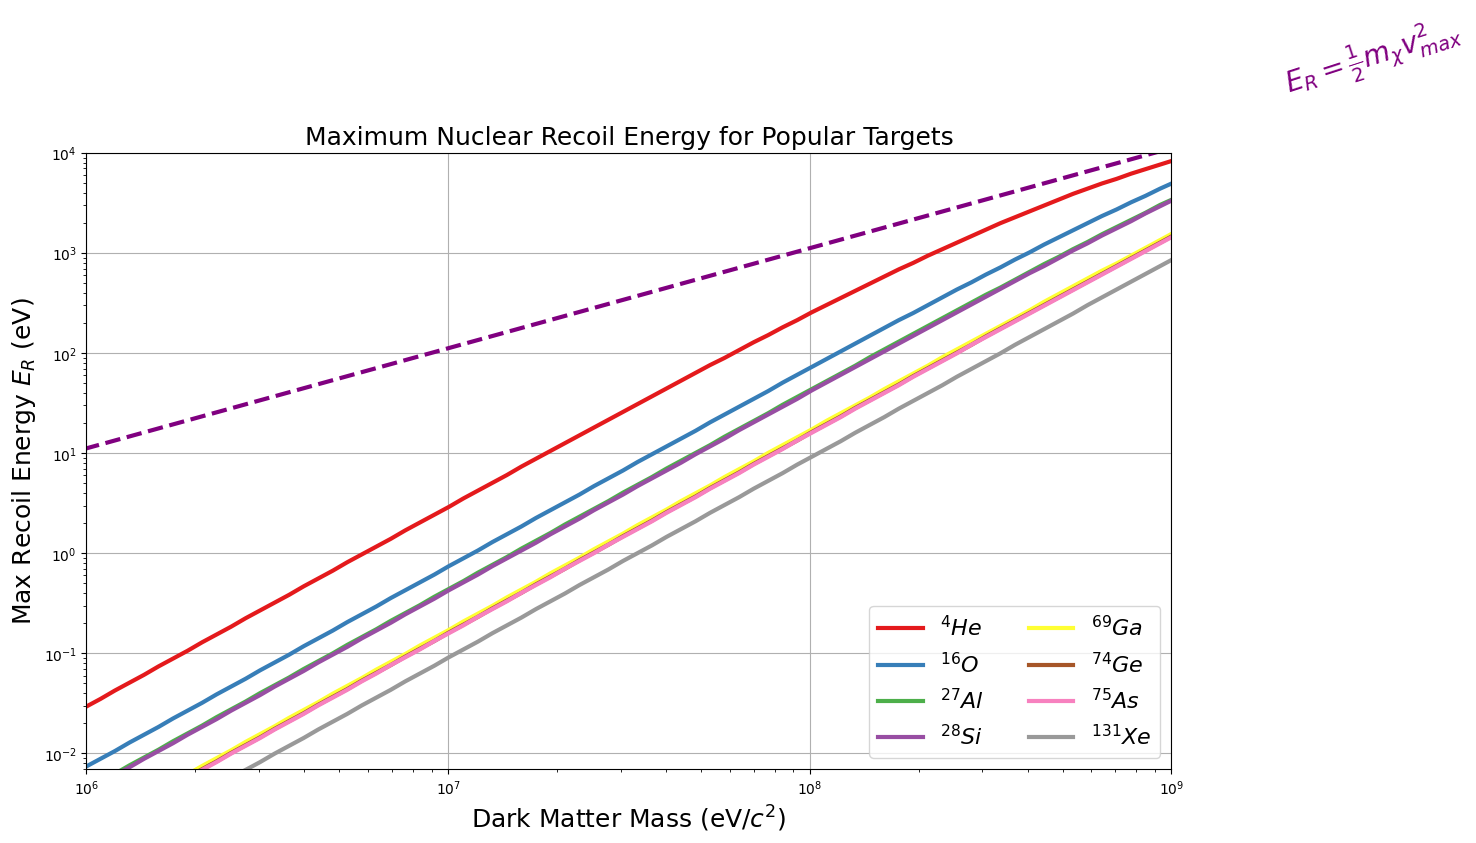

In [7]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
c = 299792458               # speed of light in m/s
v_0 = 220.0         # DM velocity in km/s
v_esc = 544         # Galactic escape velocity in km/s
v_e = 232.0         # Earth's velocity in km/s
dm_density = 0.3e12/c**2 #dm density in kev/c^2/cm^3
apriori_sigma = 1e-45 # cross section in cm^2
v_max = (v_esc+v_e)
theta = 90 #assume DM is hitting exactly perp to nucleous

masses = [4,16,27,28,69,74,75,131]
labels = ["$^{4}He$","$^{16}O$","$^{27}Al$","$^{28}Si$","$^{69}Ga$","$^{74}Ge$","$^{75}As$","$^{131}Xe$"]
wimp_mass = np.logspace(-3, 9, 300) 
#wimp_mass = [1,10,100,1000]
endpoint_arr = np.zeros(len(wimp_mass))
cmap = get_cmap(len(masses),'Set1')

maxDMke = []
for j,wimps in enumerate(wimp_mass):
    m_wimp = wimps*1e12/c**2
    dm_kemax = (1/2)*m_wimp*((v_esc+v_e))**2
    maxDMke.append(dm_kemax*1e3)
plt.plot(wimp_mass*c,maxDMke,c = 'purple',linestyle='--',linewidth=3)
text = ("$E_{R} =" r"\frac{1}{2}m_{\chi}v_{max}^{2}$")
for i,atom_mass in enumerate(masses):
    print(i)
    for j,wimps in enumerate(wimp_mass):
        m_wimp = wimps*1e12/c**2
        dm_ke = (1/2)*m_wimp*(550 / 3e5)**2
        E_values = np.logspace(dm_ke- 8, dm_ke+5, 2000)
        for k,energyvals in enumerate(E_values):
            rate = recoil_rate(energyvals,atom_mass,wimps)
            if (rate < 0):
                endpoint_arr[j] = energyvals
                break
    plt.plot(wimp_mass*c, endpoint_arr*1e3,label = labels[i],linewidth=3,c=cmap(i))
    
plt.text(2e9,4e4,text,rotation=18,fontsize=20,color = 'purple')
plt.xscale("log")
plt.xlabel('Dark Matter Mass (eV/$c^{2}$)',fontsize=18)
plt.ylabel('Max Recoil Energy $E_{R}$ (eV)',fontsize=18)
plt.title('Maximum Nuclear Recoil Energy for Popular Targets',fontsize=18)
plt.yscale("log")
plt.xlim(1e6,1e9)#plt.xlim(1e8,1e12)
plt.ylim(7e-3,1e4)
plt.grid(True)
ax.yaxis.set_tick_params(labelleft=True)
plt.legend(loc = 'lower right',fontsize = 16,ncol=2)
plt.show()

/tmp/ipykernel_2344360/2291934623.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


0
[2.99792458e+06 3.73849628e+06 4.66201002e+06 5.81365763e+06
 7.24979460e+06 9.04069779e+06 1.12740044e+07 1.40590007e+07
 1.75319693e+07 2.18628589e+07 2.72636000e+07 3.39984761e+07
 4.23970560e+07 5.28703214e+07 6.59307780e+07 8.22175347e+07
 1.02527578e+08 1.27854774e+08 1.59438500e+08 1.98824294e+08
 2.47939488e+08 3.09187515e+08 3.85565529e+08 4.80811060e+08
 5.99584916e+08]
[3.77388267e-02 5.91406295e-02 9.13019893e-02 1.43079624e-01
 2.20887981e-01 3.46154223e-01 5.34396902e-01 8.25008132e-01
 1.29287274e+00 1.99595192e+00 3.12786229e+00 4.82883005e+00
 7.45480380e+00 1.16824456e+01 1.80354949e+01 2.78434061e+01
 4.29849730e+01 6.63606995e+01 1.02448417e+02 1.58161054e+02
 2.44170868e+02 3.71351252e+02 5.73296367e+02 8.58948219e+02
 1.30634543e+03]


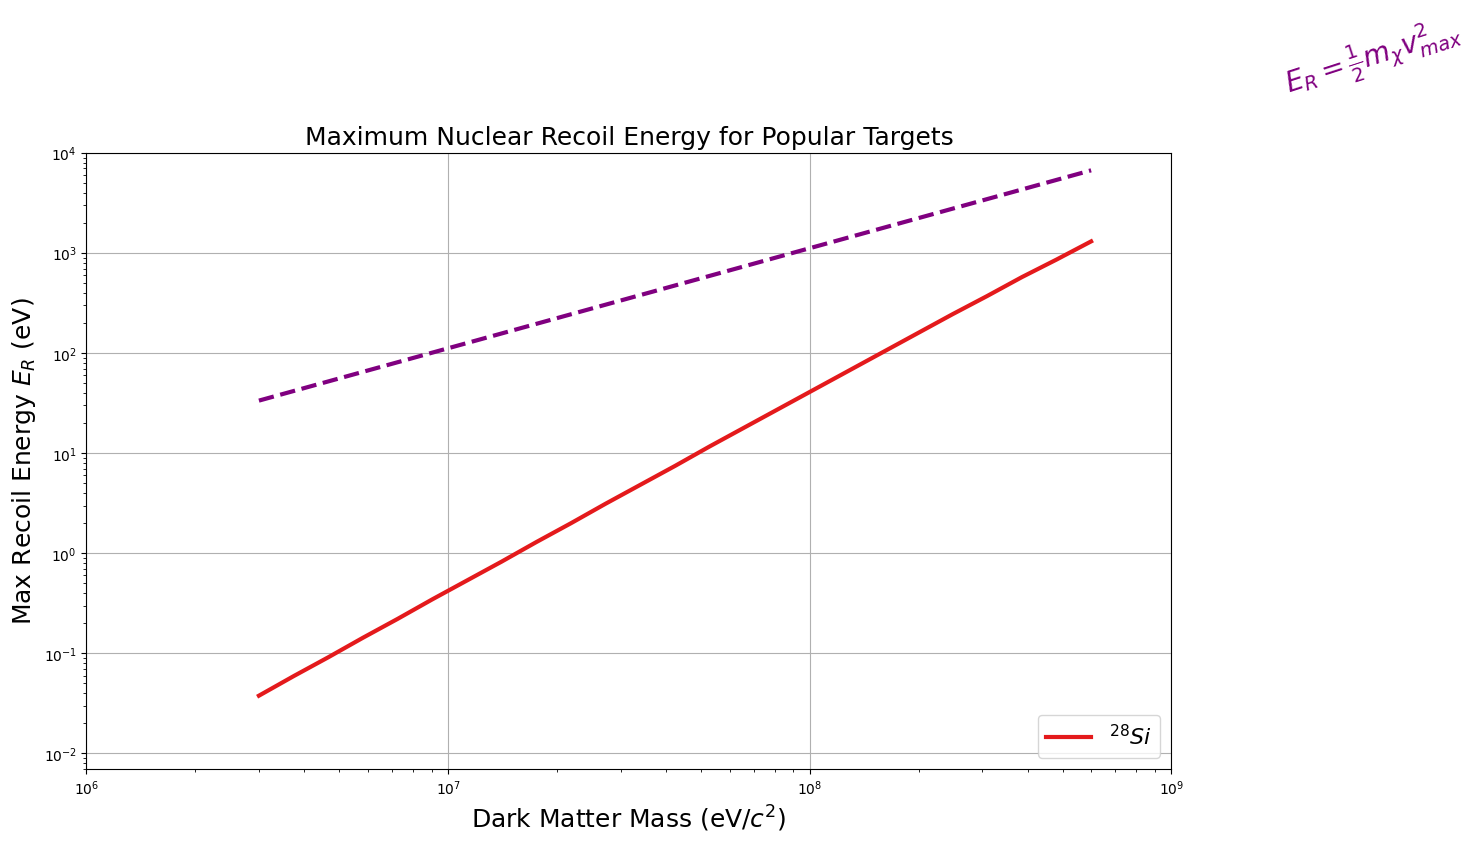

In [8]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
c = 299792458               # speed of light in m/s
v_0 = 220.0         # DM velocity in km/s
v_esc = 544         # Galactic escape velocity in km/s
v_e = 232.0         # Earth's velocity in km/s
dm_density = 0.3e12/c**2 #dm density in kev/c^2/cm^3
apriori_sigma = 1e-45 # cross section in cm^2
v_max = (v_esc+v_e)
theta = 90 #assume DM is hitting exactly perp to nucleous

masses = [28]
labels = ["$^{28}Si$"]
wimp_mass = np.geomspace(0.01, 2, num=25)
#wimp_mass = [1,10,100,1000]
endpoint_arr = np.zeros(len(wimp_mass))
cmap = get_cmap(len(masses),'Set1')

maxDMke = []
for j,wimps in enumerate(wimp_mass):
    m_wimp = wimps*1e12/c**2
    dm_kemax = (1/2)*m_wimp*((v_esc+v_e))**2
    maxDMke.append(dm_kemax*1e3)
plt.plot(wimp_mass*c,maxDMke,c = 'purple',linestyle='--',linewidth=3)
text = ("$E_{R} =" r"\frac{1}{2}m_{\chi}v_{max}^{2}$")
for i,atom_mass in enumerate(masses):
    print(i)
    for j,wimps in enumerate(wimp_mass):
        m_wimp = wimps*1e12/c**2
        dm_ke = (1/2)*m_wimp*(550 / 3e5)**2
        E_values = np.logspace(dm_ke- 8, dm_ke+5, 2000)
        for k,energyvals in enumerate(E_values):
            rate = recoil_rate(energyvals,atom_mass,wimps)
            if (rate < 0):
                endpoint_arr[j] = energyvals
                break
    plt.plot(wimp_mass*c, endpoint_arr*1e3,label = labels[i],linewidth=3,c=cmap(i))
    print(wimp_mass*c)
    print(endpoint_arr*1e3)
    
plt.text(2e9,4e4,text,rotation=18,fontsize=20,color = 'purple')
plt.xscale("log")
plt.xlabel('Dark Matter Mass (eV/$c^{2}$)',fontsize=18)
plt.ylabel('Max Recoil Energy $E_{R}$ (eV)',fontsize=18)
plt.title('Maximum Nuclear Recoil Energy for Popular Targets',fontsize=18)
plt.yscale("log")
plt.xlim(1e6,1e9)#plt.xlim(1e8,1e12)
plt.ylim(7e-3,1e4)
plt.grid(True)
ax.yaxis.set_tick_params(labelleft=True)
plt.legend(loc = 'lower right',fontsize = 16,ncol=2)
plt.show()

### Let's make the spectra for all the DM models using darklim and darkelf

In [9]:
import darklim
import sys
sys.path.append('/home/michael/DarkELF')
from darkelf import darkelf
from IPython.utils import io
import datetime as dt
import time

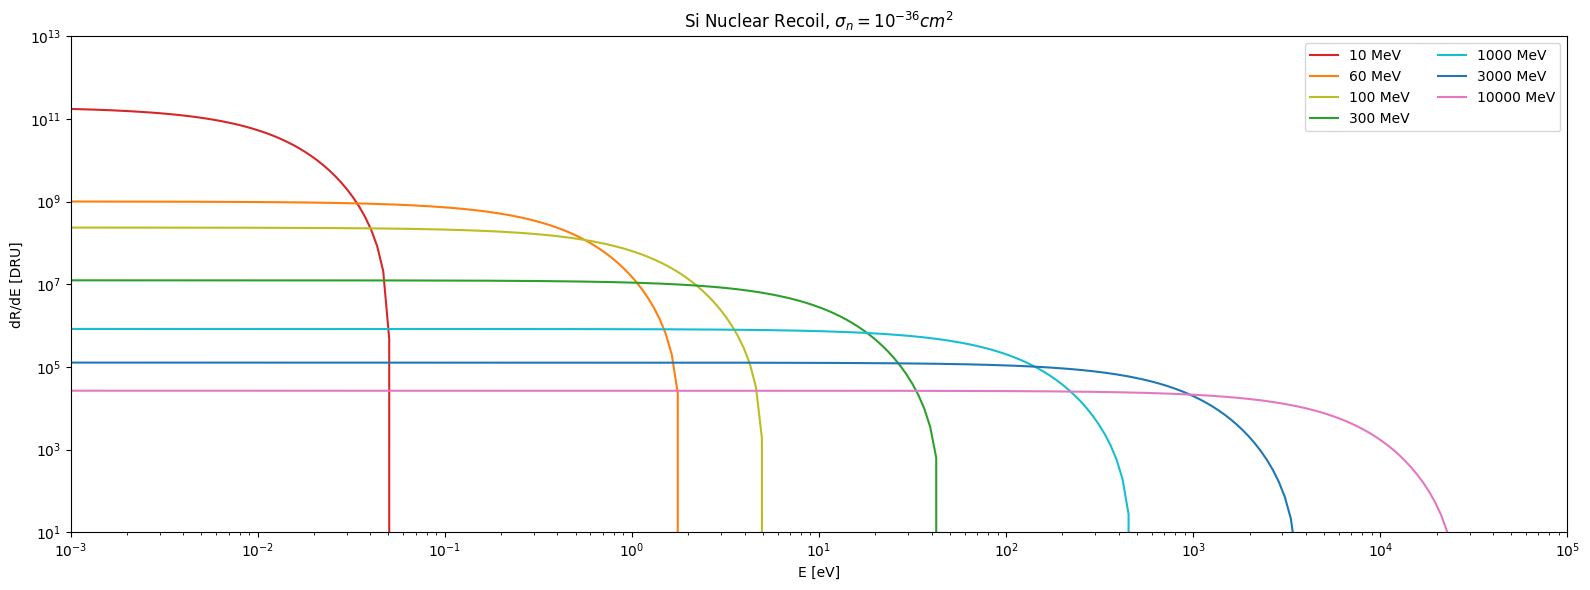

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))

keV_arr = np.geomspace(1e-6, 100, 250)

for mX, color in zip([1e7, 6e7, 1e8, 3e8, 1e9, 3e9, 1e10], 
                     ['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b']):

    dRdE_arr = darklim.limit._limit.drde(keV_arr, mX / 1e9, 1e-36, 'Si')
    axes.plot(keV_arr*1000, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)
axes.set_yscale("log")
axes.set_xscale('log')
axes.set_ylim([1e1, 1e13])
axes.set_xlim([1e-3, 1e5])

axes.set_xlabel("E [eV]")
axes.set_ylabel("dR/dE [DRU]")

axes.set_title(r'Si Nuclear Recoil, $\sigma_n = 10^{-36} cm^2$')

axes.legend(ncol=2, loc="upper right")

fig.tight_layout()
fig.show()

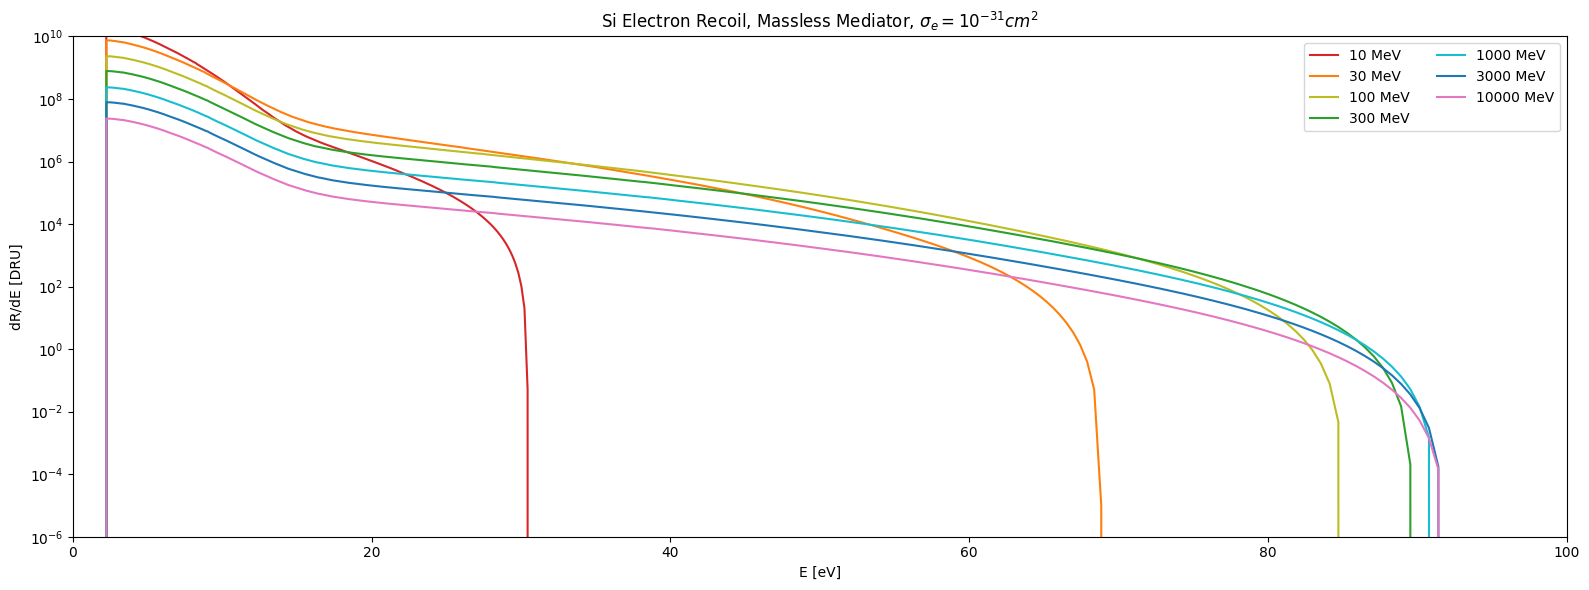

In [11]:
# Note the dimensional analysis in this cell
# DarkELF expects recoil energies and WIMP masses in eV, and returns rates in counts/kg/yr/eV
# But DarkLim expects recoil energies in keV, WIMP masses in GeV, and rates in counts/kg/day/keV (DRU)

mX_arr_eV = np.array([1e7, 3e7, 1e8, 3e8, 1e9, 3e9, 1e10])
color_arr = np.array(['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b'])
keV_arr = np.geomspace(1e-4, 100e-3, 1000)

fig, axes = plt.subplots(1, 1, figsize=(16, 6))
for i, (mX, color) in enumerate(zip(mX_arr_eV, color_arr)):

    # Initialize each DarkELF object
    if i == 0:
        print('WARNING: You are suppressing DarkELF output')

    with io.capture_output() as captured:
        darkelf_Si = darkelf(target='Si', filename="Si_mermin.dat")

    darkelf_Si.update_params(mX=mX, mediator='massless')
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * darklim.constants.bandgap_Si_eV, 1) * \
                                    darkelf_Si.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-31, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)

    axes.plot(keV_arr * 1000, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)


axes.set_yscale("log")
axes.set_xlim([0, 100])
axes.set_ylim([1e-6, 1e11])

axes.set_xlabel("E [eV]")
axes.set_ylabel("dR/dE [DRU]")

axes.set_title(r'Si Electron Recoil, Massless Mediator, $\sigma_e = 10^{-31} cm^2$')

axes.legend(ncol=2, loc="upper right")

fig.tight_layout()
fig.show()

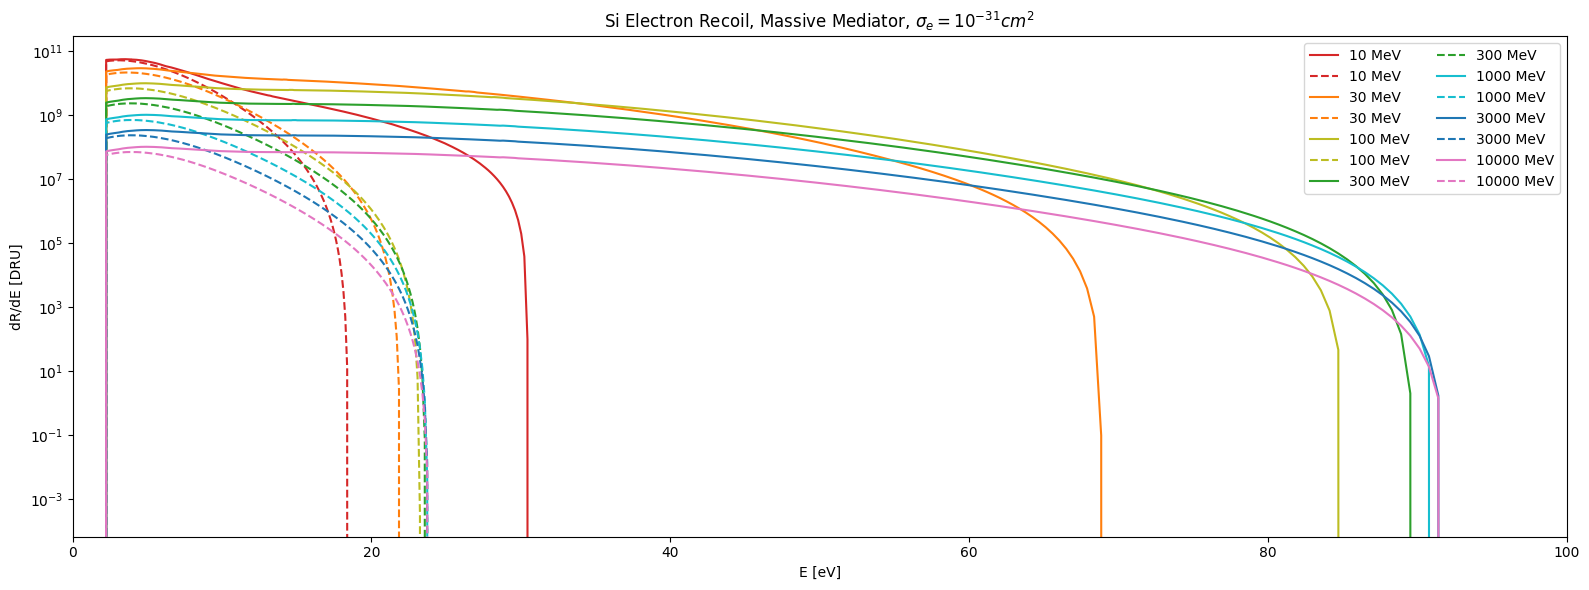

In [12]:
# Note the dimensional analysis in this cell
# DarkELF expects recoil energies and WIMP masses in eV, and returns rates in counts/kg/yr/eV
# But DarkLim expects recoil energies in keV, WIMP masses in GeV, and rates in counts/kg/day/keV (DRU)

mX_arr_eV = np.array([1e7, 3e7, 1e8, 3e8, 1e9, 3e9, 1e10])
color_arr = np.array(['#d62728', '#ff7f0e', '#bcbd22', '#2ca02c', '#17becf', '#1f77b4','#e377c2', '#9467bd', '#8c564b'])
keV_arr = np.geomspace(1e-4, 100e-3, 1000)

fig, axes = plt.subplots(1, 1, figsize=(16, 6))
for i, (mX, color) in enumerate(zip(mX_arr_eV, color_arr)):

    # Initialize each DarkELF object
    if i == 0:
        print('WARNING: You are suppressing DarkELF output')

    # Grid search Si
    with io.capture_output() as captured:
        darkelf_Si = darkelf(target='Si', filename="Si_mermin.dat")

    darkelf_Si.update_params(mX=mX, mediator='massive')
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * darklim.constants.bandgap_Si_eV, 1) * \
                                    darkelf_Si.dRdomega_electron(keV * 1000, method="grid", sigmae=1e-31, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)

    axes.plot(keV_arr * 1000, dRdE_arr, label=f'{mX/1e6:.0f} MeV', color=color)

    # Lindhard Si
    with io.capture_output() as captured:
        darkelf_Si = darkelf(target='Si')

    darkelf_Si.update_params(mX=mX, mediator='massive')
    dRde_function = lambda keV : np.heaviside(keV * 1000 - 2 * darklim.constants.bandgap_Si_eV, 1) * \
                                    darkelf_Si.dRdomega_electron(keV * 1000, method="Lindhard", sigmae=1e-31, kcut=0, withscreening=True) / 365.25 * 1000
    dRdE_arr = dRde_function(keV_arr)

    axes.plot(keV_arr * 1000, dRdE_arr, '--', label=f'{mX/1e6:.0f} MeV', color=color)

axes.set_yscale("log")
axes.set_xlim([0, 100])
#    ax.set_ylim([1e-2, 1e12])

axes.set_xlabel("E [eV]")
axes.set_ylabel("dR/dE [DRU]")

axes.set_title(r'Si Electron Recoil, Massive Mediator, $\sigma_e = 10^{-31} cm^2$')

axes.legend(ncol=2, loc="upper right")

fig.tight_layout()
fig.show()

In [13]:
def kappa_limit(target,mX):
    scalar_input = np.isscalar(mX)
    mXlist = np.atleast_1d(mX)
    lim=[]
    
    for mX in mXlist:
        target.update_params(mX=mX)
        rate=target.R_absorption(kappa=1.0)
        if rate==0.0:
            lim.append(np.nan)
        else:
            lim.append(np.sqrt(3.0/rate))
            
    if(scalar_input):
        return lim[0]
    else:
        return np.array(lim)

In [14]:
simermin = darkelf(target='Si',filename='Si_mermin.dat',phonon_filename="Si_epsphonon_data6K.dat")


 .... Loading files for Si
Loaded Si_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Sun, H. Xu, B. Da, S.-f. Mao and Z.-j. Ding, Calculations of Energy-Loss Function for 26 Materials, Chinese Journal of Chemical Physics9(2016) 663.
phonon ELF taken or calculated from M. Ikezawa and M. Ishigame, Far-Infrared AbsorptionDue to the Two-Phonon Difference Process in Si, Journal of the Physical Society of Japan 50(1981) 3734.
Loaded Si_epsphonon_data6K.dat for epsilon in phonon regime
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded /home/michael/DarkELF/darkelf/../data/Si/Si_pDoS.dat for partial densities of states
Loaded /home/michael/DarkELF/darkelf/../data/Si/Si_Fn

/home/michael/DarkELF/darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


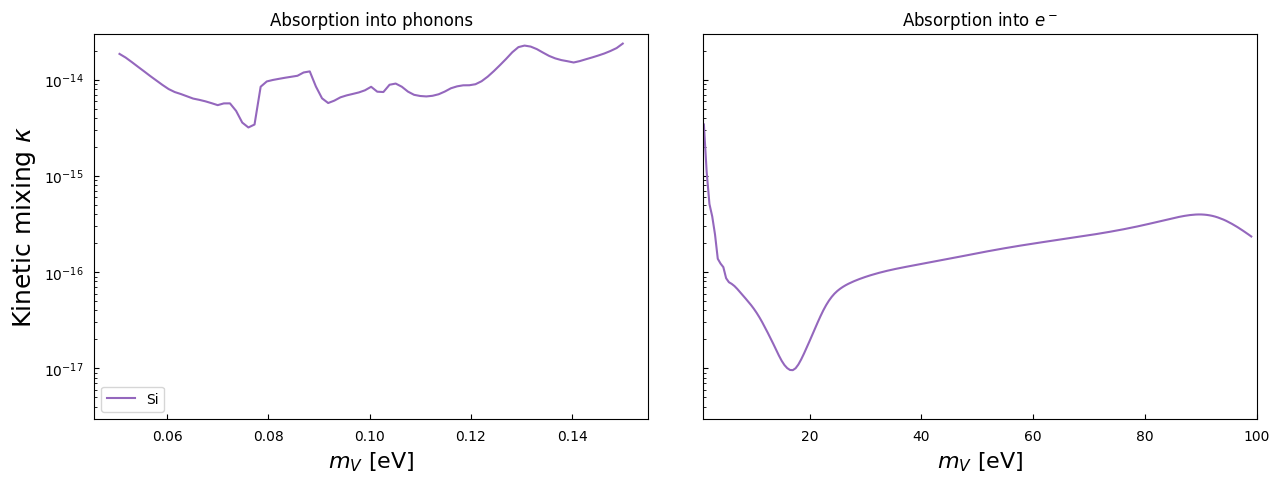

In [22]:
cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0.0,1.0,10))

fig, axs = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.subplots_adjust(wspace=0.1)

props = dict(facecolor='white', alpha=0.9, edgecolor='white',boxstyle="square,pad=0.025")

# SI
mVelectron = np.linspace(simermin.E_gap,100,200)
mVphonon = np.linspace(.03,.15,100)
a = kappa_limit(simermin,mVelectron)
axs[1].plot(mVelectron,a,color=colors[4],label='Si')
b = kappa_limit(simermin,mVphonon)
axs[0].plot(mVphonon,b,color=colors[4],label='Si')



### Plot settings for left panel
axs[0].set_yscale('log')
axs[0].set_ylim([3e-18,3e-14])
axs[0].tick_params(direction='in',which='both',pad=8)
axs[0].set_xlabel(r'$m_V$ [eV]',fontsize=16)
axs[0].set_ylabel(r'Kinetic mixing $\kappa$',fontsize=18)

axs[0].set_title('Absorption into phonons')

### Plot settings for right panel

axs[1].set_xlim([1.0,100])
axs[1].tick_params(direction='in',which='both',pad=8)
axs[1].set_xlabel(r'$m_V$ [eV]',fontsize=16)
#axs[1].set_ylim([3e-15,3e-14])

lines = axs[1].get_lines()
#labelLines(lines,xvals=[65,70,52,55,17,43,45],fontsize=9,zorder=2.5,
#           ha='center',va='center',align=False,bbox=props)
axs[1].set_title('Absorption into $e^-$')

axs[0].legend(loc='best')

#fig.savefig('plots/darkelf_absorption_1.pdf',bbox_inches='tight')

In [23]:
si = darkelf(mX=1e5,target='Si',filename='Si_gpaw_withLFE.dat',phonon_filename="Si_epsphonon_data6K.dat")
si_th = darkelf(mX=1e5,target='Si',filename='Si_gpaw_withLFE.dat',phonon_filename="Si_epsphonon_theory6K.dat")

 .... Loading files for Si
Loaded Si_gpaw_withLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave method,Journal of Physics:Condensed Matter22(2010) 253202.


/home/michael/DarkELF/darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


phonon ELF taken or calculated from M. Ikezawa and M. Ishigame, Far-Infrared AbsorptionDue to the Two-Phonon Difference Process in Si, Journal of the Physical Society of Japan 50(1981) 3734.
Loaded Si_epsphonon_data6K.dat for epsilon in phonon regime
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded /home/michael/DarkELF/darkelf/../data/Si/Si_pDoS.dat for partial densities of states
Loaded /home/michael/DarkELF/darkelf/../data/Si/Si_Fn.dat for Fn(omega)
 .... Loading files for Si
Loaded Si_gpaw_withLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave m

/home/michael/DarkELF/darkelf/epsilon.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(inplace=True,method='bfill')# fill in some NaN values


phonon ELF taken or calculated from E.L. Shirley and H.M. Lawler, Two-phonon infrared spectra of si and ge:  Calculating and assigning features,Phys. Rev. B76(2007) 054116.
Loaded Si_epsphonon_theory6K.dat for epsilon in phonon regime
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded /home/michael/DarkELF/darkelf/../data/Si/Si_pDoS.dat for partial densities of states
Loaded /home/michael/DarkELF/darkelf/../data/Si/Si_Fn.dat for Fn(omega)


In [24]:
?Si.dRdomega_phonon

Object `Si.dRdomega_phonon` not found.


In [27]:
omega = np.logspace(np.log10(0.04),np.log10(0.2),300)
domega = np.log(omega[1]/omega[0])
rt = si.dRdomega_phonon(omega)
rte = si_th.dRdomega_phonon(omega)

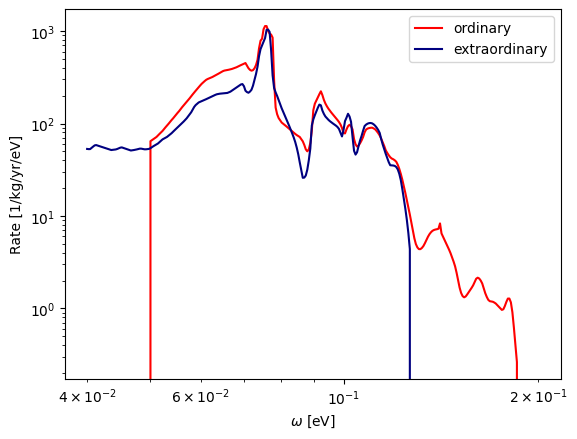

In [28]:
plt.plot(omega,rt,color='r',label="ordinary")
plt.plot(omega,rte,color='Navy',label="extraordinary")
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\omega$ [eV]')
plt.ylabel(r'Rate [1/kg/yr/eV]')
plt.legend()

#plt.savefig(plotdir+"darkelf_phonon_1.pdf",bbox_inches='tight')